## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_univ import *

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of almost 54,000 diamonds. Characteristics such as size (`carat`), cut, color, and physical size (`x`, `y`, and `z` size in mm) are present.

This is a classic dataset which can be found online, such as kaggle (https://www.kaggle.com/datasets/shivam2503/diamonds).

In [2]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [3]:
df.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## Exercise 1: Bar charts

Create a count plot showing the distribution of diamond `cut`. Pick a color (e.g., blue) and make sure all bars show that color. Order the bars from lowest quality to highest quality.

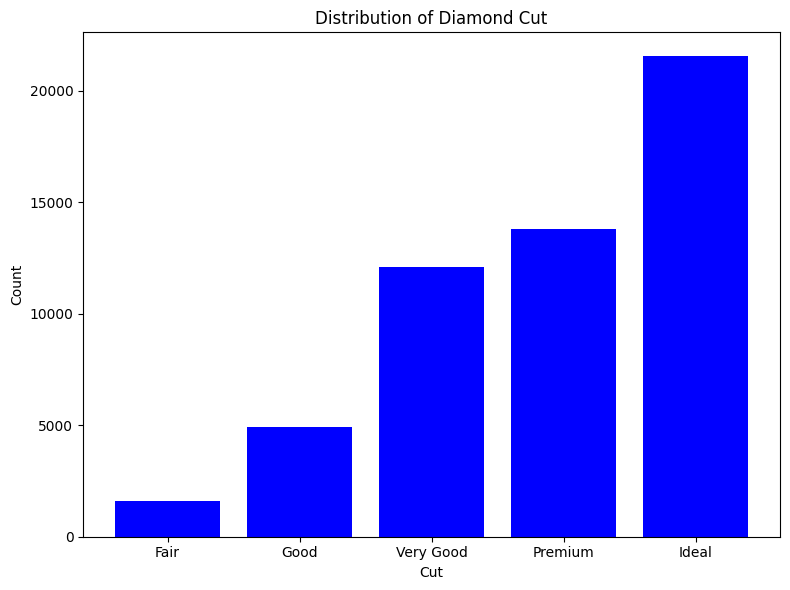

In [4]:

# YOUR CODE HERE
# Order cuts from lowest to highest quality
order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

counts = df['cut'].value_counts().reindex(order)

plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values, color='blue')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Distribution of Diamond Cut')
plt.tight_layout()

plt.show()

### Expected Output: Exercise #1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**


    Here we explicitly order the cut by passing a list to the order parameter. Additionally, we pick
    Tableau Blue.

    


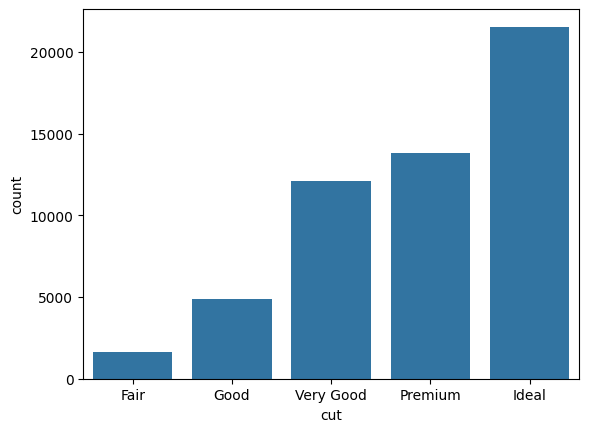

In [5]:
bar_chart_solution_1()

## Exercise 2: Bar charts

Visualize a _relative frequency plot_ of diamond `color`, and plot the results using either `matplotlib` or `seaborn`. The order should be from highest quality color grade to lowest (diamond color is graded on an alphabetical scale, with `D` the highest grade and `J` the lowest). Make sure the bar plot is plotted using a horizontal orientation.

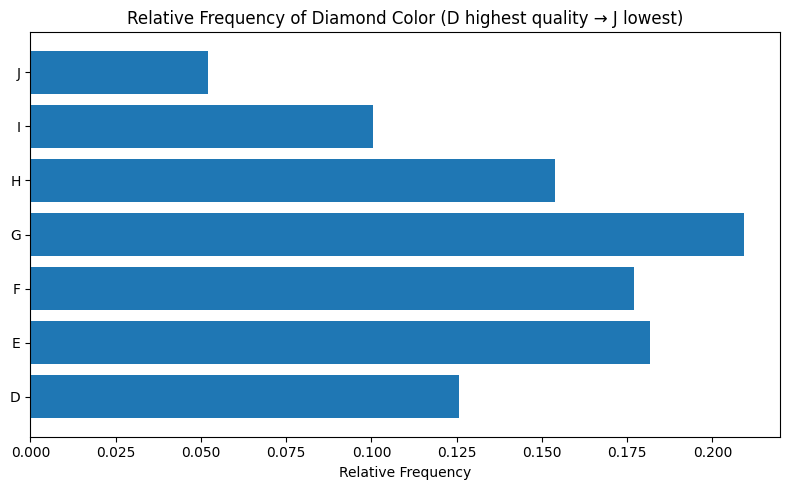

In [6]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Order from highest (D) to lowest (J)
order = ["D", "E", "F", "G", "H", "I", "J"]

# Compute relative frequencies
color_counts = df['color'].value_counts(normalize=True).reindex(order)

plt.figure(figsize=(8, 5))
plt.barh(color_counts.index, color_counts.values)
plt.xlabel("Relative Frequency")
plt.title("Relative Frequency of Diamond Color (D highest quality → J lowest)")
plt.tight_layout()
plt.show()

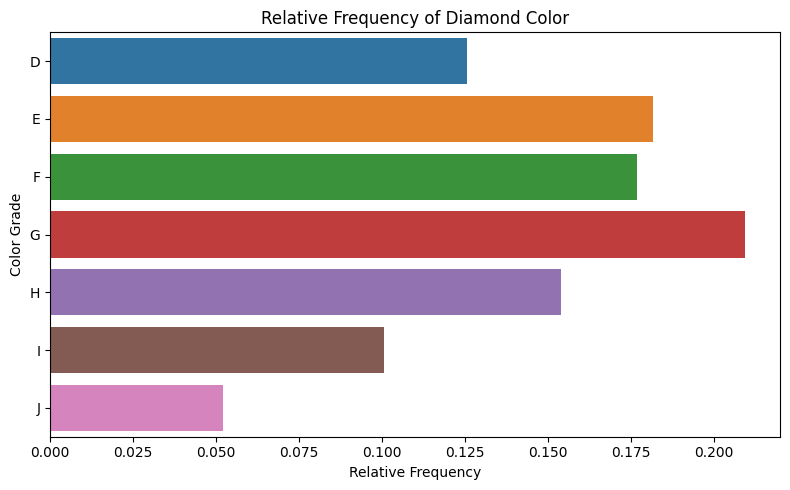

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ["D", "E", "F", "G", "H", "I", "J"]

color_counts = df['color'].value_counts(normalize=True).reindex(order)

plt.figure(figsize=(8, 5))
sns.barplot(x=color_counts.values, y=color_counts.index, orient='h')
plt.xlabel("Relative Frequency")
plt.ylabel("Color Grade")
plt.title("Relative Frequency of Diamond Color")
plt.tight_layout()
plt.show()

### Expected Output: Exercise #2


    Here we use the pandas normalize argument of the Series value_counts() method. Then we convert the
    Series to a data frame, and use a seaborn barplot.

    


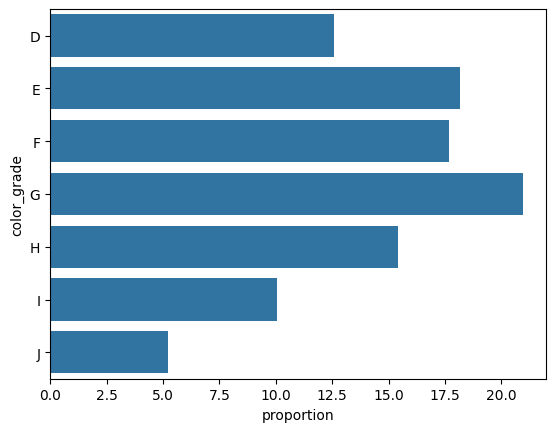

In [8]:
bar_chart_solution_2()

## Exercise 3: Histograms

Using matplotlib, plot the diamond `x` size using matplotlib. Use `0.25` mm bins, from 0 to 11 mm. Feel free to experiment and see if you can find a better bin size!

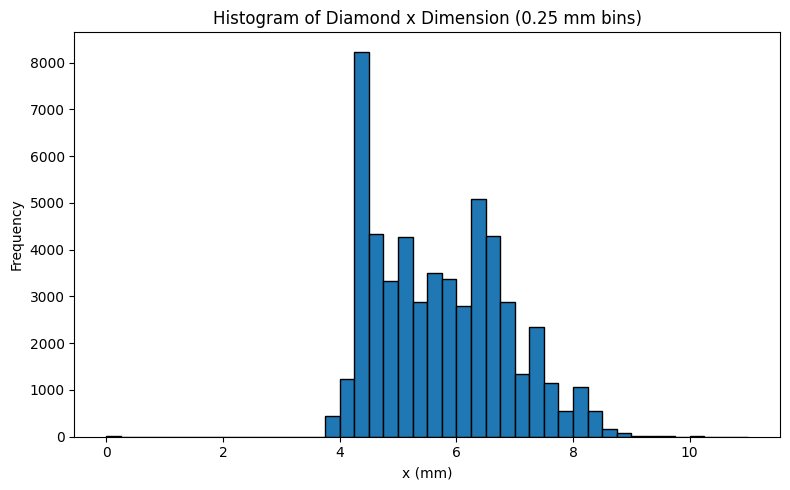

In [9]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

# Create bins from 0 to 11 with step 0.25
bins = np.arange(0, 11.25, 0.25)

plt.figure(figsize=(8, 5))
plt.hist(df['x'], bins=bins, edgecolor='black')
plt.xlabel("x (mm)")
plt.ylabel("Frequency")
plt.title("Histogram of Diamond x Dimension (0.25 mm bins)")
plt.tight_layout()
plt.show()

### Expected Output: Exercise #3


    We get a distribution that looks bimodal, with a large peak around 4, a dip, and a secondary peak
    around 6.5mm. It also has a rightward skew.

    


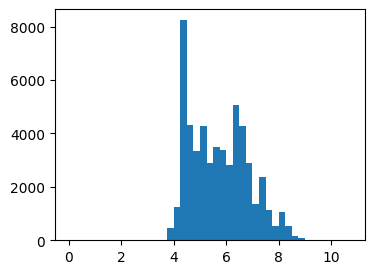

In [11]:
histogram_solution_1()

## Exercise 4: Histograms

Now using seaborn, plot the diamond `x`, `y,` and `z` sizes. The same binning as before.

### Tip move from "wide" to "long" format
Seaborn was built to work with long, "tidy" format. Oftentimes then one may find it easier to convert data into long form. The pandas function `melt` does this conversion. For this exercise, you can use either format, but if you convert to long format, you only have to make one call to seaborn, instead of 3.

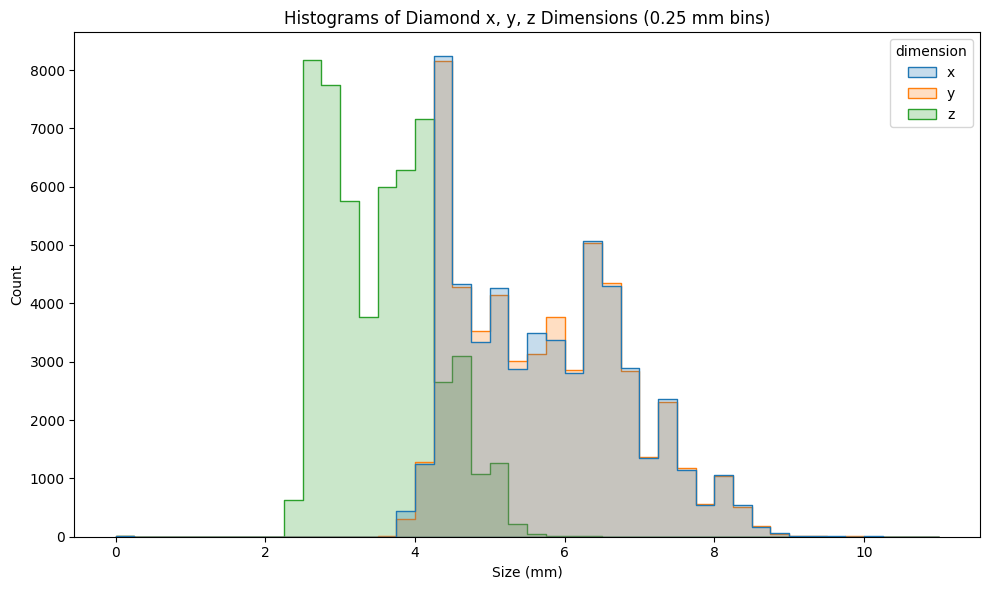

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# use to bring your data into the "tidyverse"
df_tidy = pd.melt(df, value_vars=['x', 'y', 'z'],
                  var_name='dimension', value_name='size')
# Create bins (same as before: 0 to 11 in 0.25 mm increments)
bins = np.arange(0, 11.25, 0.25)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_tidy, x='size', hue='dimension', bins=bins, kde=False, element='step')
plt.xlabel("Size (mm)")
plt.title("Histograms of Diamond x, y, z Dimensions (0.25 mm bins)")
plt.tight_layout()
plt.show()

### Expected Output: Exercise #4


    These two solutions should be identical (with small differences in color hue). We see that the x and
    y dimensions are roughly the same, while z is notable smaller.

    


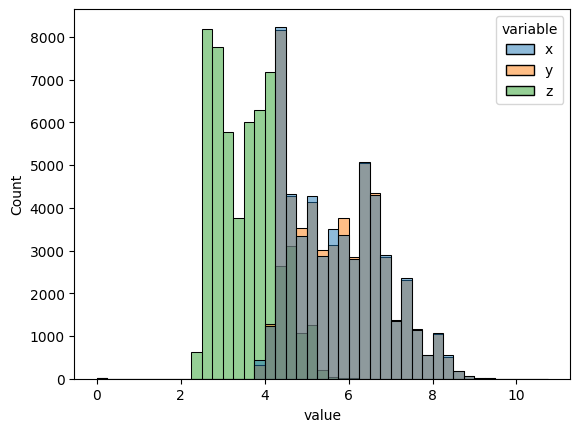

In [16]:
histogram_solution_2_long_format()


    These two solutions should be identical (with small differences in color hue). We see that the x and
    y dimensions are roughly the same, while z is notable smaller.

    


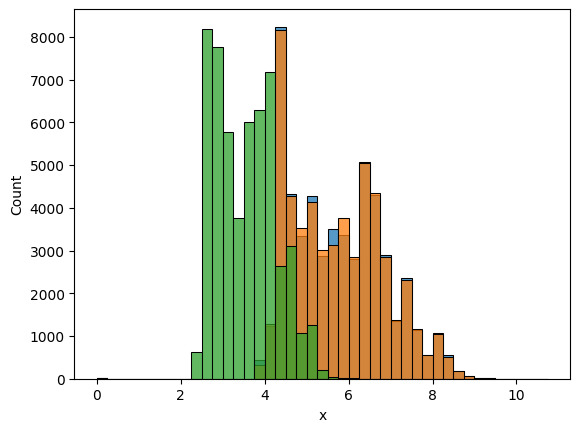

In [17]:
histogram_solution_2_wide_format()

## Exercise 5: Histogram normalization

Using seaborn, plot the diamond price distribution. Using approximately 50 bins, what rough percentage of diamonds cost `~$2500`?

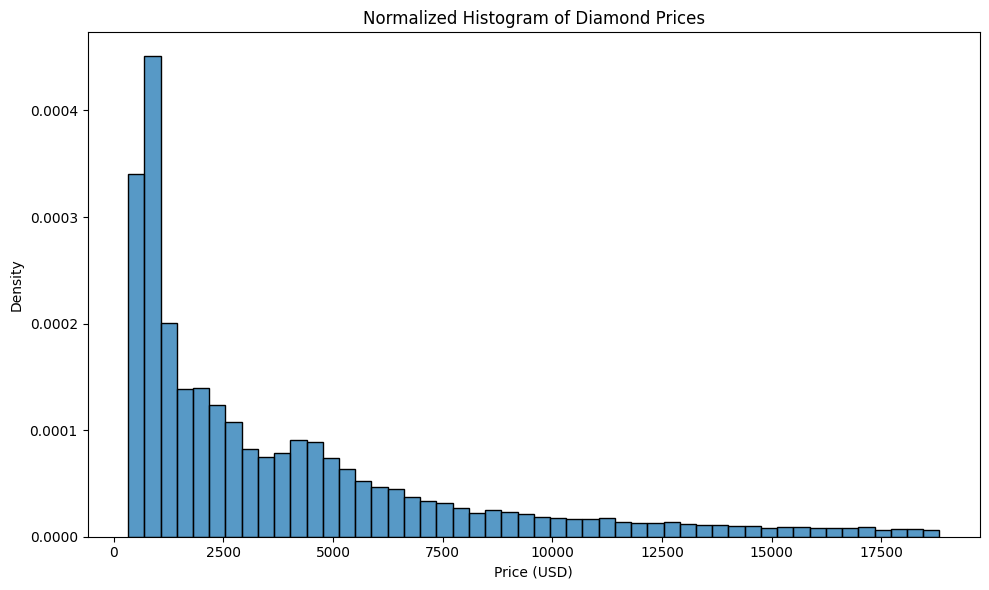

In [18]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='price',
    bins=50,
    stat='density'   # normalize the histogram
)

plt.xlabel("Price (USD)")
plt.title("Normalized Histogram of Diamond Prices")
plt.tight_layout()
plt.show()

### Expected Output: Exercise #5


    Price is right-skewed, with a mode around $4500. The bars around $2500 appear to compris about 4-5\%
    of the diamonds in this data set.

    


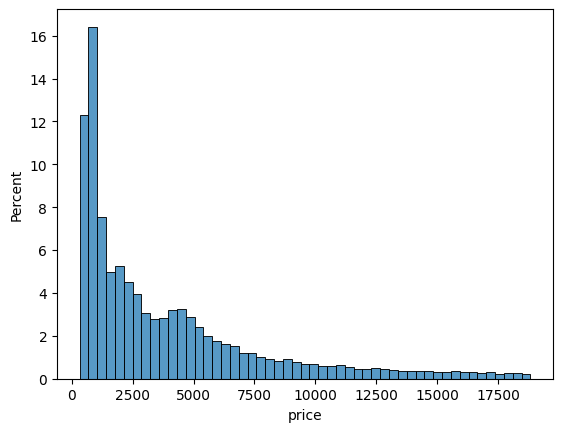

In [19]:
histogram_solution_3()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!